# Ejercicio1_Clustering_012
#### - Carla Mayela De la Garza Fernandez 
#### - Alan Zamarron Medrano 					


## Ejercicio Regresion Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("RegresionLineal.csv")
data

,Peso,Altura
0,68.78,162
1,74.11,212
2,71.73,220
3,69.88,206
4,67.25,152
5,68.78,183
6,68.34,167
7,67.01,175
8,63.45,156
9,71.19,186


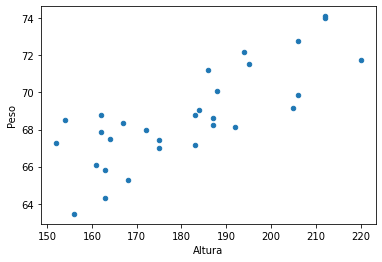

In [11]:
data.plot(kind="scatter", x="Altura", y="Peso")

In [4]:
lm = smf.ols(formula="Peso~Altura",data=data).fit()
lm.params

Intercept    49.071634
Altura        0.108611
dtype: float64

In [9]:
altura_pred = lm.predict(pd.DataFrame(data["Altura"]))
altura_pred

0     66.666580
1     72.097119
2     72.966006
3     71.445455
4     65.580473
5     68.947407
6     67.209634
7     68.078521
8     66.014916
9     69.273239
10    68.947407
11    66.775191
12    66.775191
13    67.752688
14    70.142125
15    67.318245
16    66.557970
17    66.883802
18    69.490461
19    69.381850
20    66.666580
21    69.924904
22    69.056018
23    71.445455
24    68.078521
25    65.797694
26    69.381850
27    72.097119
28    70.250736
29    71.336844
dtype: float64

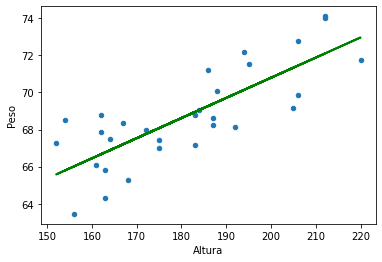

In [10]:
data.plot(kind="scatter", x="Altura", y="Peso")
plt.plot(pd.DataFrame(data["Altura"]),altura_pred,c="green",linewidth=2)

## Ejercicio Algoritmo Apriori
### 1era parte: ejercicio resuelto sin libreria mlxtend
### 2da parte: ejercicio resuelto con libreria mlxtend

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Asosiacion.csv", header=None)
data

,0,1,2,3
0,A,B,C,E
1,B,E,NaN,NaN
2,C,D,E,NaN
3,A,C,D,NaN
4,A,C,E,NaN


In [3]:
A=0
B=0
C=0
D=0
E=0
print("Nivel k=1")
for i in range(0, 5):
     for j in range(0, 4):
            if (data.values[i,j] == 'A'):
                A=A+1
            if (data.values[i,j] == 'B'):
                B=B+1
            if (data.values[i,j] == 'C'):
                C=C+1
            if (data.values[i,j] == 'D'):
                D=D+1
            if (data.values[i,j] == 'E'):
                E=E+1
SA=A/5
SB=B/5
SC=C/5
SD=D/5
SE=E/5
print("Soporte A="+str(SA))
print("Soporte B="+str(SB))
print("Soporte C="+str(SC))
print("Soporte D="+str(SD))
print("Soporte E="+str(SE))
print("Se eliminan B y D, debido a que tienen soporte menor del umbral de .5")

Nivel k=1
Soporte A=0.6
Soporte B=0.4
Soporte C=0.8
Soporte D=0.4
Soporte E=0.8
Se eliminan B y D, debido a que tienen soporte menor del umbral de .5


In [4]:
Uno = ['A','C','E'],['E'],['C','E'],['A','C'],['A','C','E']
import csv
with open('Nivel2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['A','C','E','NaN'])
    writer.writerow(['E','NaN','NaN','NaN'])
    writer.writerow(['C','E','NaN','NaN'])
    writer.writerow(['A','C','NaN','NaN'])
    writer.writerow(['A','C','E','NaN'])

In [5]:
dos = pd.read_csv("Nivel2.csv", header=None)
dos

,0,1,2,3
0,A,C,E,NaN
1,E,NaN,NaN,NaN
2,C,E,NaN,NaN
3,A,C,NaN,NaN
4,A,C,E,NaN


In [6]:
print("Nivel k=2")
AC=0
AE=0
CE=0
x=0
y=1
for i in range(0, 5):
        y=1
        j=0
        for j in range(0, 4):
            if(dos.values[i,j]=='A' and dos.values[i,y]=='C'):
                AC=AC+1
                y=y+1
            if(dos.values[i,j]=='A' and dos.values[i,y]=='E'):
                y=y-1
                AE=AE+1
            if(dos.values[i,j]=='C' and dos.values[i,y]=='E'):
                CE=CE+1
            y=y+1
SAC=AC/5
SAE=AE/5
SCE=CE/5
print("SoporteAC= "+ str(SAC))
print("SoporteAE= "+ str(SAE))
print("SoporteCE= "+ str(SCE))
print("Se eliminan AE, debido a que tiene soporte menor del umbral de .5")

Nivel k=2
SoporteAC= 0.6
SoporteAE= 0.4
SoporteCE= 0.6
Se eliminan AE, debido a que tiene soporte menor del umbral de .5


## Otra forma de solucionar el ejercicio utilizando mlxtend

In [11]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
file = pd.read_excel('ejercicio1_parte2.xlsx')
file.head()

,A,B,C,D,E
0,1,1,1,0,1
1,0,1,0,0,1
2,0,0,1,1,1
3,1,0,1,1,0
4,1,0,1,0,1


In [18]:
frequent_itemsets = apriori(file, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(A)
1,0.8,(C)
2,0.8,(E)
3,0.6,"(A, C)"
4,0.6,"(C, E)"
